<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

Decide on your problem statement that will guide your analysis for this project. For guidelines, sample prompts, or inspiration, check out the README.

**To-Do:** *Replace this cell with your problem statement.*

Potential problem statement:  

Examine the data and see which states are testing the best and the worst given their participation rate.  The characteristics of these states can be then further investigated to determine how to improve outcomes.

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

**To-Do:** *Fill out this cell (or edit the above cell) with any other background or information that is necessary for your problem statement.*

### Choose your Data

There are 10 datasets included in the [`data`](./data/) folder for this project. You are required to pick **at least two** of these to complete your analysis. Feel free to use more than two if you would like, or add other relevant datasets you find online.

* [`act_2017.csv`](./data/act_2017.csv): 2017 ACT Scores by State
* [`act_2018.csv`](./data/act_2018.csv): 2018 ACT Scores by State
* [`act_2019.csv`](./data/act_2019.csv): 2019 ACT Scores by State
* [`act_2019_ca.csv`](./data/act_2019_ca.csv): 2019 ACT Scores in California by School
* [`sat_2017.csv`](./data/sat_2017.csv): 2017 SAT Scores by State
* [`sat_2018.csv`](./data/sat_2018.csv): 2018 SAT Scores by State
* [`sat_2019.csv`](./data/sat_2019.csv): 2019 SAT Scores by State
* [`sat_2019_by_intended_college_major.csv`](./data/sat_2019_by_intended_college_major.csv): 2019 SAT Scores by Intended College Major
* [`sat_2019_ca.csv`](./data/sat_2019_ca.csv): 2019 SAT Scores in California by School
* [`sat_act_by_college.csv`](./data/sat_act_by_college.csv): Ranges of Accepted ACT & SAT Student Scores by Colleges

**To-Do:** *Fill out this cell with the datasets you will use for your analysis. Write a brief description of the contents for each dataset that you choose.*

### Outside Research

Based on your problem statement and your chosen datasets, spend some time doing outside research on state policies or additional information that might be relevant. Summarize your findings below. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. **Make sure that you cite your sources.**

**To-Do:** *Fill out this cell with outside research or any additional background information that will support your analysis.*

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

The mean will be the sum of the list divided by the length of the list

I import the stats and random modules to verify that I am generating the correct value for mean and also to generate a random sample of 100 numbers from zero to 1_000_000.  I set the seed so that the result is replicable.

In [1]:
# Code:
import random
random.seed(1)
list_nums = random.sample(range(0,1_000_000),100)
list_nums
def mean(nums_list):
    return sum(nums_list)/len(nums_list)
mean(list_nums)
from statistics import mean as stats_mean, pstdev as stats_psd
stats_mean(list_nums), mean(list_nums)

(538234.23, 538234.23)

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

I imported pstdev from the statistics library to verify my function sd as correct.

In [2]:
# Code:
def std_dev(numbers):
    mu = mean(numbers)
    n = len(numbers)
    return sum([((number - mu)**2)/n for number in numbers])**.5
 
std_dev([1,2,3,4,5,6,7,8])
stats_psd([1,2,3,4,5,6,7,8]),std_dev([1,2,3,4,5,6,7,8])


(2.29128784747792, 2.29128784747792)

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [3]:
# Code:
def pct_dec(pct):
    #note that this function only works for percentages between 0 and 100.
    #get rid of percentage sign 
    pct = pct[:-1]
    
    #partition at the decimal, left pad zeros till there are three digits 
    left_dec_3 = pct.split(".")[0].zfill(3)
    
    #convert the string to float
    if len(pct.split("."))==2:
        return float(f'{left_dec_3[0]}.{left_dec_3[1:]}{pct.split(".")[1]}')
    else:
        return float(f'{left_dec_3[0]}.{left_dec_3[1:]}')
    
print(f'{pct_dec("100%")} {pct_dec(".1%")} {pct_dec("32.09%")}')

1.0 0.001 0.3209


--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [53]:
# Imports:
import matplotlib as plt
import pandas as pd
import numpy as np
import seaborn as sns
import pprint

## Data Import and Cleaning

### Data Import & Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of percents (ex. '50%', '30.5%', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to floats! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

Import the datasets that you selected for this project

In [5]:
# Code:
sat_ca = pd.read_csv('../data/sat_2019_ca.csv')
sat_major = pd.read_csv('../data/sat_2019_by_intended_college_major.csv')
sat_2017 = pd.read_csv('../data/sat_2017.csv')
sat_2018 = pd.read_csv('../data/sat_2018.csv')
sat_2019 = pd.read_csv('../data/sat_2019.csv')

act_2017 = pd.read_csv('../data/act_2017.csv')
act_2018 = pd.read_csv('../data/act_2018.csv')
act_2019 = pd.read_csv('../data/act_2019.csv')

1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.

In [6]:
print(
f'sat_2017: \n{sat_2017.head()}\n\
sat_2018: \n{sat_2018.head()}\n\
sat_2019: \n{sat_2019.head()}\n\
act_2017: \n{act_2017.head()}\n\
act_2018: \n{act_2018.head()}\n\
act_2019: \n{act_2019.head()}\n\
' )

sat_2017: 
        State Participation  Evidence-Based Reading and Writing  Math  Total
0     Alabama            5%                                 593   572   1165
1      Alaska           38%                                 547   533   1080
2     Arizona           30%                                 563   553   1116
3    Arkansas            3%                                 614   594   1208
4  California           53%                                 531   524   1055
sat_2018: 
        State Participation  Evidence-Based Reading and Writing  Math  Total
0     Alabama            6%                                 595   571   1166
1      Alaska           43%                                 562   544   1106
2     Arizona           29%                                 577   572   1149
3    Arkansas            5%                                 592   576   1169
4  California           60%                                 540   536   1076
sat_2019: 
        State Participation Rate  EBRW  Mat

2. Check for missing values.

In [7]:
print(
f'missing values by dataset:\n\
sat_2017: \n{[sum(sat_2017.isna()[col]) for col in sat_2017.columns]}\n\
sat_2018: \n{[sum(sat_2018.isna()[col]) for col in sat_2018.columns]}\n\
sat_2019: \n{[sum(sat_2019.isna()[col]) for col in sat_2019.columns]}\n\
act_2017: \n{[sum(act_2017.isna()[col]) for col in act_2017.columns]}\n\
act_2018: \n{[sum(act_2018.isna()[col]) for col in act_2018.columns]}\n\
act_2019: \n{[sum(act_2019.isna()[col]) for col in act_2019.columns]}\n\
' )

missing values by dataset:
sat_2017: 
[0, 0, 0, 0, 0]
sat_2018: 
[0, 0, 0, 0, 0]
sat_2019: 
[0, 0, 0, 0, 0]
act_2017: 
[0, 0, 0, 0, 0, 0, 0]
act_2018: 
[0, 0, 0]
act_2019: 
[0, 0, 0]



**idea/question:  how is the performance on the second most popular test?**

3. Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).


In [8]:
#ACT 2017:
act_2017.describe()
act_2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


A Science score of 2.3 for Maryland is bizarre, and must be a typo.  I found source data:
https://www.act.org/content/dam/act/unsecured/documents/cccr2017/ACT_2017-Average_Scores_by_State.pdf
and I will use the value that they have of 23.2

In [9]:
act_2017.iloc[21,5] = 23.2
act_2017.iloc[21,5]

23.2

In [10]:
# act_2018.describe() act_2019.describe()
for act_yr in [act_2017,act_2018,act_2019]:
    print(f' {act_yr.describe()}')

          English       Math    Reading    Science
count  52.000000  52.000000  52.000000  52.000000
mean   20.919231  21.173077  22.001923  21.442308
std     2.332132   1.963602   2.048672   1.723351
min    16.300000  18.000000  18.100000  18.200000
25%    19.000000  19.400000  20.475000  19.975000
50%    20.550000  20.900000  21.700000  21.300000
75%    23.300000  23.100000  24.125000  23.200000
max    25.500000  25.300000  26.000000  24.900000
        Composite
count  52.000000
mean   21.544231
std     2.119417
min    17.700000
25%    19.975000
50%    21.300000
75%    23.725000
max    25.600000
        Composite
count  52.000000
mean   21.450000
std     2.175487
min    17.900000
25%    19.800000
50%    20.950000
75%    23.650000
max    25.500000


I'm not seeing any outrageous values for the ACT.

In [11]:
# act_2018.describe() act_2019.describe()
for sat_yr in [sat_2017,sat_2018,sat_2019]:
    print(f' {sat_yr.describe()}')

        Evidence-Based Reading and Writing        Math        Total
count                           51.000000   51.000000    51.000000
mean                           569.117647  547.627451  1126.098039
std                             45.666901   84.909119    92.494812
min                            482.000000   52.000000   950.000000
25%                            533.500000  522.000000  1055.500000
50%                            559.000000  548.000000  1107.000000
75%                            613.000000  599.000000  1212.000000
max                            644.000000  651.000000  1295.000000
        Evidence-Based Reading and Writing        Math        Total
count                           51.000000   51.000000    51.000000
mean                           563.686275  556.235294  1120.019608
std                             47.502627   47.772623    94.155083
min                            480.000000  480.000000   977.000000
25%                            534.500000  522.500000  1057.

Noting that the count is 53 for the 2019 SAT, I investigated and found that this dataset includes scores for Puerto Rico and the Virgin Islands.  I will remove these datapoints since they don't have participation percentages.

In [12]:
sat_2019.drop([39,47],inplace = True)
sat_2019

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065
5,Colorado,100%,518,506,1024
6,Connecticut,100%,529,516,1046
7,Delaware,100%,499,486,985
8,District of Columbia,94%,495,480,975
9,Florida,100%,516,483,999


Again, I'm not seeing any outliers for the SAT data.


In [13]:
act_2018.describe()

,Composite
count,52.000000
mean,21.544231
std,2.119417
min,17.700000
25%,19.975000
50%,21.300000
75%,23.725000
max,25.600000


Note that the values are all numeric and within a couple standard deviations. However looking into the counts, Act_2018 has two rows for Maine.

In [14]:
act_2018

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7
5,Colorado,30%,23.9
6,Connecticut,26%,25.6
7,Delaware,17%,23.8
8,District of columbia,32%,23.6
9,Florida,66%,19.9


District of columbia should be changed to District of Columbia, with Columbia uppercase.

4. Fix any errors you identified in steps 2-3.


In [15]:
act_2018.loc[act_2018['State']=='District of columbia','State'] = 'District of Columbia'

In [16]:
act_2018.drop_duplicates(inplace=True)
act_2018.describe()

,Composite
count,51.000000
mean,21.496078
std,2.111583
min,17.700000
25%,19.950000
50%,21.300000
75%,23.650000
max,25.600000


In [17]:
act_2017.iloc[21,5] = 23.2
act_2017.iloc[21,5]

23.2

5. Display the data types of each feature.


In [18]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

6. Fix any incorrect data types found in step 5.

In [19]:
act_2017['Participation']

0      60%
1     100%
2      65%
3      62%
4     100%
5      31%
6     100%
7      31%
8      18%
9      32%
10     73%
11     55%
12     90%
13     38%
14     93%
15     35%
16     67%
17     73%
18    100%
19    100%
20      8%
21     28%
22     29%
23     29%
24    100%
25    100%
26    100%
27    100%
28     84%
29    100%
30     18%
31     34%
32     66%
33     31%
34    100%
35     98%
36     75%
37    100%
38     40%
39     23%
40     21%
41    100%
42     80%
43    100%
44     45%
45    100%
46     29%
47     29%
48     29%
49     69%
50    100%
51    100%
Name: Participation, dtype: object

In [20]:
act_2017.dtypes
act_2017.Composite[51] = 20.2
act_2017.Composite = act_2017.Composite.astype(float)
act_2017.Composite

/var/folders/jl/p0b83vx55ls1hskdgz1sddkw0000gn/T/ipykernel_50050/110078459.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act_2017.Composite[51] = 20.2


0     21.0
1     19.2
2     19.8
3     19.7
4     19.4
5     22.8
6     20.8
7     25.2
8     24.1
9     24.2
10    19.8
11    21.4
12    19.0
13    22.3
14    21.4
15    22.6
16    21.9
17    21.7
18    20.0
19    19.5
20    24.3
21    23.6
22    25.4
23    24.1
24    21.5
25    18.6
26    20.4
27    20.3
28    21.4
29    17.8
30    25.5
31    23.9
32    19.7
33    24.2
34    19.1
35    20.3
36    22.0
37    19.4
38    21.8
39    23.7
40    24.0
41    18.7
42    21.8
43    19.8
44    20.7
45    20.3
46    23.6
47    23.8
48    21.9
49    20.4
50    20.5
51    20.2
Name: Composite, dtype: float64

It looks `act_2017.Composite` like Composite was turned into an object dtype since the last row had a value with an 'x' appended.  I removed the x and converted the column to float.

In [21]:
sat_2019.columns

Index(['State', 'Participation Rate', 'EBRW', 'Math', 'Total'], dtype='object')

In [22]:
sat_2019.rename(columns={'Participation Rate':'Participation'}, inplace = True)
sat_2017.rename(columns={'Evidence-Based Reading and Writing':'EBRW'}, inplace = True)
sat_2018.rename(columns={'Evidence-Based Reading and Writing':'EBRW'}, inplace = True)

Percentage to proportion:

In [23]:
data_list = [act_2017,act_2018,act_2019,sat_2017,sat_2018, sat_2019]
for t_y in data_list:
    print(t_y.dtypes)

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object
State             object
Participation     object
Composite        float64
dtype: object
State             object
Participation     object
Composite        float64
dtype: object
State            object
Participation    object
EBRW              int64
Math              int64
Total             int64
dtype: object
State            object
Participation    object
EBRW              int64
Math              int64
Total             int64
dtype: object
State            object
Participation    object
EBRW              int64
Math              int64
Total             int64
dtype: object


In [24]:
data_list = [act_2017,act_2018,act_2019,sat_2017,sat_2018, sat_2019]
for t_y in data_list:
    if t_y['Participation'].dtype != float:
        t_y['Participation'] = [pct_dec(p) for p in t_y['Participation']]

In [25]:
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          51 non-null     object 
 1   Participation  51 non-null     float64
 2   EBRW           51 non-null     int64  
 3   Math           51 non-null     int64  
 4   Total          51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


`act_2017.Composite[51]` had been a string with an 'x' appended.  x removed, and the whole column converted to float

7. Rename Columns. 


In [26]:
sat_2019.rename(columns={'Participation Rate':'Participation'}, inplace = True)
sat_2017.rename(columns={'Evidence-Based Reading and Writing':'EBRW'}, inplace = True)
sat_2018.rename(columns={'Evidence-Based Reading and Writing':'EBRW'}, inplace = True)

This was done above while preparing the participation column to be converted to proportion from percentage. Code repeated right above.  The changes were made for the sake of brevity.

`act_2017.columns` gives 

`Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')`

which is quite reasonable so I won't change any column names.

8. Drop unnecessary rows (if needed).

In [27]:
act_2017

,State,Participation,English,Math,Reading,Science,Composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
5,California,0.31,22.5,22.7,23.1,22.2,22.8
6,Colorado,1.00,20.1,20.3,21.2,20.9,20.8
7,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2
8,Delaware,0.18,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2


In [28]:
act_2017_national = act_2017.iloc[0,]
act_2017_national
act_2017 = act_2017.iloc[1:,]

To keep consisent accross years, I dropped national from 2017 and put the row in a variable `act_2017_national` in case it is
needed later.

A quick little EDA detour.  I want to see if there is much value in keeping score categories or if I can make do with a simpler dataframe based only on composite scores.

In [29]:
sat_2017.corr()

,Participation,EBRW,Math,Total
Participation,1.000000,-0.874326,-0.566558,-0.867540
EBRW,-0.874326,1.000000,0.628405,0.996661
Math,-0.566558,0.628405,1.000000,0.632648
Total,-0.867540,0.996661,0.632648,1.000000


I've noticed here that the math correlation apears to be an aberration.  Upon investigating and corroborating with the College Board data, we find that the Math score for Maryland was missing its last digit.

In [30]:
sat_2017.corr()
sat_2017.loc[sat_2017['State']=='Maryland','Math'] = 524

In [31]:
sat_2017[sat_2017['State']=='Maryland']["Math"]

20    524
Name: Math, dtype: int64

I've noticed that Maryland's 2017 sat math score is incorrect.  I'll investigate:
according to :
https://reports.collegeboard.org/media/pdf/2017-maryland-sat-suite-of-assessments-annual-report.pdf

Maryland's Math section score was 524.

In [32]:
sat_2017.loc[sat_2017['State']=='Maryland','Math'] = 524
sat_2017[sat_2017['State']=='Maryland']["Math"]
sat_2017.corr()


,Participation,EBRW,Math,Total
Participation,1.000000,-0.874326,-0.855091,-0.867540
EBRW,-0.874326,1.000000,0.987056,0.996661
Math,-0.855091,0.987056,1.000000,0.996822
Total,-0.867540,0.996661,0.996822,1.000000


From examining the correlation matrices, I believe it is safe to use total and composite columns as capturing what we know about test performance.

In [33]:
data_list = [act_2017,act_2018,act_2019,sat_2017,sat_2018, sat_2019]

In [34]:
for act_yr in [act_2017,act_2018,act_2019]:
    try:
        act_yr.drop(columns=['English','Math','Reading','Science'], inplace = True)
    except KeyError:
        pass
    act_yr.rename(columns={'Participation':'ACT_Participation','Composite':'ACT_Score'},inplace=True)

/Users/william/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Users/william/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [35]:
for sat_yr in [sat_2017,sat_2018,sat_2019]:
    try:
        sat_yr.drop(columns=['EBRW','Math'], inplace = True)
    except KeyError:
        print('KeyError') 
    try:
        sat_yr.rename(columns={'Total':'SAT_Score','Participation':'SAT_Participation'}, inplace = True)
    except KeyError:
        print('KeyError')

In [36]:
print(act_2017.columns,sat_2017.columns)

Index(['State', 'ACT_Participation', 'ACT_Score'], dtype='object') Index(['State', 'SAT_Participation', 'SAT_Score'], dtype='object')


In [37]:
act_2017.rename(columns = {"ACT_Participation":"2017_ACT_Participation",
                           "ACT_Score":"2017_ACT_Score"}, inplace =True)
act_2018.rename(columns = {"ACT_Participation":"2018_ACT_Participation",
                           "ACT_Score":"2018_ACT_Score"}, inplace =True)
act_2019.rename(columns = {"ACT_Participation":"2019_ACT_Participation",
                           "ACT_Score":"2019_ACT_Score"}, inplace =True)
sat_2017.rename(columns = {"SAT_Participation":"2017_SAT_Participation",
                           "SAT_Score":"2017_SAT_Score"}, inplace =True)
sat_2018.rename(columns = {"SAT_Participation":"2018_SAT_Participation",
                           "SAT_Score":"2018_SAT_Score"}, inplace =True)
sat_2019.rename(columns = {"SAT_Participation":"2019_SAT_Participation",
                           "SAT_Score":"2019_SAT_Score"}, inplace =True)

With the above columns renamed, the dataframes are ready to be merged

9. Merge dataframes that can be merged.

I decided to merge all these dataframes with an inner join on 'State'.

In [38]:
test=act_2017.merge(sat_2017, on = 'State').merge(act_2018, on = 'State')\
.merge(sat_2018, on = 'State').merge(act_2019, on = 'State').merge(sat_2019, on = 'State')

In [39]:
test

,State,2017_ACT_Participation,2017_ACT_Score,2017_SAT_Participation,2017_SAT_Score,2018_ACT_Participation,2018_ACT_Score,2018_SAT_Participation,2018_SAT_Score,2019_ACT_Participation,2019_ACT_Score,2019_SAT_Participation,2019_SAT_Score
0,Alabama,1.00,19.2,0.05,1165,1.00,19.1,0.06,1166,1.00,18.9,0.07,1143
1,Alaska,0.65,19.8,0.38,1080,0.33,20.8,0.43,1106,0.38,20.1,0.41,1097
2,Arizona,0.62,19.7,0.30,1116,0.66,19.2,0.29,1149,0.73,19.0,0.31,1134
3,Arkansas,1.00,19.4,0.03,1208,1.00,19.4,0.05,1169,1.00,19.3,0.06,1141
4,California,0.31,22.8,0.53,1055,0.27,22.7,0.60,1076,0.23,22.6,0.63,1065
5,Colorado,1.00,20.8,0.11,1201,0.30,23.9,1.00,1025,0.27,23.8,1.00,1024
6,Connecticut,0.31,25.2,1.00,1041,0.26,25.6,1.00,1053,0.22,25.5,1.00,1046
7,Delaware,0.18,24.1,1.00,996,0.17,23.8,1.00,998,0.13,24.1,1.00,985
8,District of Columbia,0.32,24.2,1.00,950,0.32,23.6,0.92,977,0.32,23.5,0.94,975
9,Florida,0.73,19.8,0.83,1017,0.66,19.9,0.56,1099,0.54,20.1,1.00,999


10. Perform any additional cleaning that you feel is necessary.

I don't believe any additional cleaning is necessary at this time.

11. Save your cleaned and merged dataframes as csv files.

In [40]:
test.to_csv("../data/test_df.csv")

In [41]:
test_df = pd.read_csv("../data/test_df.csv")

In [42]:
test_df.set_index("State", inplace = True)

In [43]:
test_df.drop("Unnamed: 0",axis=1,inplace=True)

In [44]:
test_df['ACT_Score_Avg'] = test_df[['2017_ACT_Score','2018_ACT_Score', '2019_ACT_Score']].mean(axis = 1)
test_df['SAT_Score_Avg'] = test_df[['2017_SAT_Score','2018_SAT_Score', '2019_SAT_Score']].mean(axis = 1)
test_df['SAT_Part_Avg'] = test_df[['2017_SAT_Participation','2018_SAT_Participation', '2019_SAT_Participation']].mean(axis = 1)
test_df['ACT_Part_Avg'] = test_df[['2017_ACT_Participation','2018_ACT_Participation', '2019_ACT_Participation']].mean(axis = 1)
test_df

,2017_ACT_Participation,2017_ACT_Score,2017_SAT_Participation,2017_SAT_Score,2018_ACT_Participation,2018_ACT_Score,2018_SAT_Participation,2018_SAT_Score,2019_ACT_Participation,2019_ACT_Score,2019_SAT_Participation,2019_SAT_Score,ACT_Score_Avg,SAT_Score_Avg,SAT_Part_Avg,ACT_Part_Avg
State,,,,,,,,,,,,,,,,
Alabama,1.00,19.2,0.05,1165,1.00,19.1,0.06,1166,1.00,18.9,0.07,1143,19.066667,1158.000000,0.060000,1.000000
Alaska,0.65,19.8,0.38,1080,0.33,20.8,0.43,1106,0.38,20.1,0.41,1097,20.233333,1094.333333,0.406667,0.453333
Arizona,0.62,19.7,0.30,1116,0.66,19.2,0.29,1149,0.73,19.0,0.31,1134,19.300000,1133.000000,0.300000,0.670000
Arkansas,1.00,19.4,0.03,1208,1.00,19.4,0.05,1169,1.00,19.3,0.06,1141,19.366667,1172.666667,0.046667,1.000000
California,0.31,22.8,0.53,1055,0.27,22.7,0.60,1076,0.23,22.6,0.63,1065,22.700000,1065.333333,0.586667,0.270000
Colorado,1.00,20.8,0.11,1201,0.30,23.9,1.00,1025,0.27,23.8,1.00,1024,22.833333,1083.333333,0.703333,0.523333
Connecticut,0.31,25.2,1.00,1041,0.26,25.6,1.00,1053,0.22,25.5,1.00,1046,25.433333,1046.666667,1.000000,0.263333
Delaware,0.18,24.1,1.00,996,0.17,23.8,1.00,998,0.13,24.1,1.00,985,24.000000,993.000000,1.000000,0.160000
District of Columbia,0.32,24.2,1.00,950,0.32,23.6,0.92,977,0.32,23.5,0.94,975,23.766667,967.333333,0.953333,0.320000


In [45]:
test_df.to_csv("../data/test_df.csv")

### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

In [46]:
test_df.columns

Index(['2017_ACT_Participation', '2017_ACT_Score', '2017_SAT_Participation',
       '2017_SAT_Score', '2018_ACT_Participation', '2018_ACT_Score',
       '2018_SAT_Participation', '2018_SAT_Score', '2019_ACT_Participation',
       '2019_ACT_Score', '2019_SAT_Participation', '2019_SAT_Score',
       'ACT_Score_Avg', 'SAT_Score_Avg', 'SAT_Part_Avg', 'ACT_Part_Avg'],
      dtype='object')

**To-Do:** *Edit the table below to create your own data dictionary for the datasets you chose.*

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


**To-Do:** *Edit the table below to create your own data dictionary for the datasets you chose.*

|Feature|Type|Dataset|Description|
|---|---|---|---|
|State|object|test_df|The state to which the observations pertain|
|2017_ACT_Participation|float|test_df|Proportion of the state's 2017 HS graduates who took the ACT| 
|2017_SAT_Participation|float|test_df|Proportion of the state's 2017 HS graduates who took the SAT|
|2017_ACT_Score|float|test_df|Mean ACT Composite score of the state's 2017 HS graduates|
|2018_ACT_Score|float|test_df|Mean ACT Composite score of the state's 2018 HS graduates|
|2019_ACT_Score|float|test_df|Mean ACT Composite score of the state's 2019 HS graduates|
|2017_SAT_Score|float|test_df|Mean SAT Total score of the state's 2017 HS graduates|
|2018_SAT_Score|float|test_df|Mean SAT Total score of the state's 2018 HS graduates|
|2019_SAT_Score|float|test_df|Mean SAT Total score of the state's 2019 HS graduates|
|ACT_Score_Avg|float|test_df|Mean of statewide ACT scores across 2017, 2018 and 2019|
|SAT_Score_Avg|float|test_df|Mean of statewide SAT scores across 2017, 2018 and 2019|
|ACT_Part_Avg|float|test_df|Mean of statewide ACT participation across 2017, 2018 and 2019|
|SAT_Part_Avg|float|test_df|Mean of statewide SAT participation across 2017, 2018 and 2019|

## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which states have the highest and lowest participation rates for the 2017, 2019, or 2019 SAT and ACT?
        - Which states have the highest and lowest mean total/composite scores for the 2017, 2019, or 2019 SAT and ACT?
        - Do any states with 100% participation on a given test have a rate change year-to-year?
        - Do any states show have >50% participation on *both* tests each year?
        - Which colleges have the highest median SAT and ACT scores for admittance?
        - Which California school districts have the highest and lowest mean test scores?
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

1. Summary Statistics.

In [47]:
test_df.describe()

,2017_ACT_Participation,2017_ACT_Score,2017_SAT_Participation,2017_SAT_Score,2018_ACT_Participation,2018_ACT_Score,2018_SAT_Participation,2018_SAT_Score,2019_ACT_Participation,2019_ACT_Score,2019_SAT_Participation,2019_SAT_Score,ACT_Score_Avg,SAT_Score_Avg,SAT_Part_Avg,ACT_Part_Avg
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.652549,21.519608,0.398039,1126.098039,0.617255,21.496078,0.457451,1120.019608,0.586667,21.464706,0.490588,1113.078431,21.493464,1119.732026,0.448693,0.618824
std,0.321408,2.020695,0.352766,92.494812,0.340371,2.111583,0.373143,94.155083,0.345159,2.194523,0.387476,97.197910,2.078130,90.974771,0.357529,0.328698
min,0.080000,17.800000,0.020000,950.000000,0.070000,17.700000,0.020000,977.000000,0.060000,17.900000,0.020000,943.000000,17.800000,967.333333,0.020000,0.070000
25%,0.310000,19.800000,0.040000,1055.500000,0.285000,19.950000,0.045000,1057.500000,0.245000,19.800000,0.055000,1038.000000,19.966667,1056.000000,0.045000,0.280000
50%,0.690000,21.400000,0.380000,1107.000000,0.660000,21.300000,0.520000,1098.000000,0.540000,21.100000,0.540000,1097.000000,21.400000,1094.333333,0.506667,0.643333
75%,1.000000,23.600000,0.660000,1212.000000,1.000000,23.650000,0.775000,1204.000000,1.000000,23.700000,0.820000,1210.000000,23.400000,1200.166667,0.726667,0.990000
max,1.000000,25.500000,1.000000,1295.000000,1.000000,25.600000,1.000000,1298.000000,1.000000,25.500000,1.000000,1284.000000,25.466667,1292.333333,1.000000,1.000000


From examining the above, it is interesting to note that the mean participation on the ACT is declining year over year while the participation on the SAT is increassing year over year.  ACT Participation declined from .653 to .587 while
SAT participation increased from .398 to .491. Surprisingly, ACT scores decreased slighly from 21.52 to 21.46 and SAT
scores decreased rom 1126 to 1113.  I would have expected the inverse relationship between participation and scores seen between states to also hold between years.  It does for the SAT, though not for the ACT.

2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [48]:
test_df.dtypes
test_df['2017_SAT_Score'] = test_df['2017_SAT_Score'].astype(float)
test_df['2018_SAT_Score'] = test_df['2018_SAT_Score'].astype(float)
test_df['2019_SAT_Score'] = test_df['2019_SAT_Score'].astype(float)

In [49]:
sd = {col:std_dev(test_df.loc[:,col]) for col in test_df.columns\
      if test_df.loc[:,col].dtype==float}
sd

{'2017_ACT_Participation': 0.3182417575123181,
 '2017_ACT_Score': 2.0007860815819893,
 '2017_SAT_Participation': 0.3492907076664507,
 '2017_SAT_Score': 91.58351056778743,
 '2018_ACT_Participation': 0.33701735820410317,
 '2018_ACT_Score': 2.0907790821411787,
 '2018_SAT_Participation': 0.3694661922353942,
 '2018_SAT_Score': 93.22742384464433,
 '2019_ACT_Participation': 0.34175823737030464,
 '2019_ACT_Score': 2.172901153595978,
 '2019_SAT_Participation': 0.3836584048685726,
 '2019_SAT_Score': 96.24027185617864,
 'ACT_Score_Avg': 2.0576550268429536,
 'SAT_Score_Avg': 90.07844607392488,
 'SAT_Part_Avg': 0.3540060671977226,
 'ACT_Part_Avg': 0.32545983794169353}

In [50]:
test_df["2017_ACT_Participation"].mean()

0.6525490196078431

In [51]:
descriptive_stats={col_name:{'min':min(col_data),'q1':col_data.quantile(.25),'q2':col_data.quantile(.5),\
          'q3':col_data.quantile(.75), 'max':max(col_data),'mean':col_data.mean(),'sd':std_dev(col_data)}\
 for (col_name, col_data) in test_df.iteritems() if col_data.dtypes == float}

In [55]:
pprint.pprint(descriptive_stats)

{'2017_ACT_Participation': {'max': 1.0,
                            'mean': 0.6525490196078431,
                            'min': 0.08,
                            'q1': 0.31,
                            'q2': 0.69,
                            'q3': 1.0,
                            'sd': 0.3182417575123181},
 '2017_ACT_Score': {'max': 25.5,
                    'mean': 21.519607843137255,
                    'min': 17.8,
                    'q1': 19.8,
                    'q2': 21.4,
                    'q3': 23.6,
                    'sd': 2.0007860815819893},
 '2017_SAT_Participation': {'max': 1.0,
                            'mean': 0.39803921568627454,
                            'min': 0.02,
                            'q1': 0.04,
                            'q2': 0.38,
                            'q3': 0.66,
                            'sd': 0.3492907076664507},
 '2017_SAT_Score': {'max': 1295.0,
                    'mean': 1126.0980392156862,
                    'min': 950.0,
  

Investigate trends in the data.
Using sorting and/or masking (along with the .head() method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
Which states have the highest and lowest participation rates for the 2017, 2019, or 2019 SAT and ACT?
Which states have the highest and lowest mean total/composite scores for the 2017, 2019, or 2019 SAT and ACT?
Do any states with 100% participation on a given test have a rate change year-to-year?
Do any states show have >50% participation on both tests each year?
Which colleges have the highest median SAT and ACT scores for admittance?
Which California school districts have the highest and lowest mean test scores?
You should comment on your findings at each step in a markdown cell below your code block. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

highest and lowest participation rates:

        - Which states have the highest and lowest participation rates for the 2017, 2018, or 2019 SAT and ACT?


In [217]:
test_df["2017_ACT_Participation"].sort_values(ascending=False)[0:20]
ACT_2017_full_participation = test_df["2017_ACT_Participation"][test_df["2017_ACT_Participation"]==1].index
ACT_2018_full_participation = test_df["2018_ACT_Participation"][test_df["2018_ACT_Participation"]==1].index
ACT_2019_full_participation = test_df["2019_ACT_Participation"][test_df["2019_ACT_Participation"]==1].index
ACT_full_participation = [ACT_2017_full_participation,ACT_2018_full_participation,ACT_2019_full_participation]

In [57]:
set.intersection(*map(set,ACT_full_participation))

{'Alabama',
 'Arkansas',
 'Kentucky',
 'Louisiana',
 'Mississippi',
 'Montana',
 'Nevada',
 'North Carolina',
 'Oklahoma',
 'Tennessee',
 'Utah',
 'Wisconsin',
 'Wyoming'}

Neat intersection code from: https://stackoverflow.com/questions/3852780/python-intersection-of-multiple-lists

Here we see that Alabama, Arkansas, Kentucky, Louisiana, Mississippi, Montana, Nevada, North Carolina, Oklahoma, Tennessee, Utah, Wisconsin, and Wyoming all have 100 percent participation on the ACT for years 2017, 2018, and 2019.

In [58]:
test_df["2019_ACT_Participation"].sort_values(ascending=True)[0:20]
ACT_2017_low_participation = test_df["2017_ACT_Participation"][test_df["2017_ACT_Participation"]<.2].index
ACT_2018_low_participation = test_df["2018_ACT_Participation"][test_df["2018_ACT_Participation"]<.2].index
ACT_2019_low_participation = test_df["2019_ACT_Participation"][test_df["2019_ACT_Participation"]<.2].index
ACT_low_participation = [ACT_2017_low_participation,ACT_2018_low_participation,ACT_2019_low_participation]
print('ACT Participation under .2 for all years: ')
set.intersection(*map(set,ACT_low_participation))

ACT Participation under .2 for all years: 


{'Delaware', 'Maine', 'New Hampshire'}

In [59]:
ACT_low_participation

[Index(['Delaware', 'Maine', 'New Hampshire'], dtype='object', name='State'),
 Index(['Delaware', 'Maine', 'New Hampshire', 'Rhode Island'], dtype='object', name='State'),
 Index(['Delaware', 'Maine', 'Michigan', 'New Hampshire', 'Pennsylvania',
        'Rhode Island'],
       dtype='object', name='State')]

In [60]:
test_df['2017_ACT_Participation'].mean()
test_df['2018_ACT_Participation'].mean()
test_df['2019_ACT_Participation'].mean()


0.5866666666666667

When the cutoff for low participation is <.3,
'Delaware','Maine', 'Massachusetts', 'Michigan', 'New Hampshire', 'Pennsylvania', 'Rhode Island', 'Vermont', 'Virginia', 'Washington'
all have low ACT participation for all years.

When the cutoff is .2, the states with low ACT participation in all three years are 'Delaware', 'Maine', 'New Hampshire'.
Maine consistently has the lowest participation at .08, .07, and .06 for 2017, 2018, and 2019 respectively.

In [61]:
test_df["2018_ACT_Participation"].sort_values(ascending=True).head()

State
Maine            0.07
Rhode Island     0.15
New Hampshire    0.16
Delaware         0.17
Pennsylvania     0.20
Name: 2018_ACT_Participation, dtype: float64

        - Which states have the highest and lowest mean total/composite scores for the 2017, 2018, or 2019 SAT and ACT?


In [62]:
for col in test_df.columns:
    print(f'{col}     min: {test_df.index[np.argmin(test_df[col])]}:{test_df[col].min()} \
    max: {test_df.index[np.argmax(test_df[col])]}:{max(test_df[col])}')

2017_ACT_Participation     min: Maine:0.08     max: Alabama:1.0
2017_ACT_Score     min: Nevada:17.8     max: New Hampshire:25.5
2017_SAT_Participation     min: Iowa:0.02     max: Connecticut:1.0
2017_SAT_Score     min: District of Columbia:950.0     max: Minnesota:1295.0
2018_ACT_Participation     min: Maine:0.07     max: Alabama:1.0
2018_ACT_Score     min: Nevada:17.7     max: Connecticut:25.6
2018_SAT_Participation     min: North Dakota:0.02     max: Colorado:1.0
2018_SAT_Score     min: District of Columbia:977.0     max: Minnesota:1298.0
2019_ACT_Participation     min: Maine:0.06     max: Alabama:1.0
2019_ACT_Score     min: Nevada:17.9     max: Connecticut:25.5
2019_SAT_Participation     min: North Dakota:0.02     max: Colorado:1.0
2019_SAT_Score     min: West Virginia:943.0     max: Minnesota:1284.0
ACT_Score_Avg     min: Nevada:17.8     max: Massachusetts:25.46666666666667
SAT_Score_Avg     min: District of Columbia:967.3333333333334     max: Minnesota:1292.3333333333333
SAT_Part_

In [63]:
test_df.describe()

,2017_ACT_Participation,2017_ACT_Score,2017_SAT_Participation,2017_SAT_Score,2018_ACT_Participation,2018_ACT_Score,2018_SAT_Participation,2018_SAT_Score,2019_ACT_Participation,2019_ACT_Score,2019_SAT_Participation,2019_SAT_Score,ACT_Score_Avg,SAT_Score_Avg,SAT_Part_Avg,ACT_Part_Avg
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.652549,21.519608,0.398039,1126.098039,0.617255,21.496078,0.457451,1120.019608,0.586667,21.464706,0.490588,1113.078431,21.493464,1119.732026,0.448693,0.618824
std,0.321408,2.020695,0.352766,92.494812,0.340371,2.111583,0.373143,94.155083,0.345159,2.194523,0.387476,97.197910,2.078130,90.974771,0.357529,0.328698
min,0.080000,17.800000,0.020000,950.000000,0.070000,17.700000,0.020000,977.000000,0.060000,17.900000,0.020000,943.000000,17.800000,967.333333,0.020000,0.070000
25%,0.310000,19.800000,0.040000,1055.500000,0.285000,19.950000,0.045000,1057.500000,0.245000,19.800000,0.055000,1038.000000,19.966667,1056.000000,0.045000,0.280000
50%,0.690000,21.400000,0.380000,1107.000000,0.660000,21.300000,0.520000,1098.000000,0.540000,21.100000,0.540000,1097.000000,21.400000,1094.333333,0.506667,0.643333
75%,1.000000,23.600000,0.660000,1212.000000,1.000000,23.650000,0.775000,1204.000000,1.000000,23.700000,0.820000,1210.000000,23.400000,1200.166667,0.726667,0.990000
max,1.000000,25.500000,1.000000,1295.000000,1.000000,25.600000,1.000000,1298.000000,1.000000,25.500000,1.000000,1284.000000,25.466667,1292.333333,1.000000,1.000000


Minnesota has the highest SAT scores in 2017, 2018, and 2019.  DC has the lowest SAT scores for 2017 and 2018, while West Virginia has the lowest SAT score for 2019.

Nevada has the lowest ACT scores in all years, while New Hampshire has the highest score in 2017 and Connecticut has the highest scores in 2018 and 2019.

        - Do any states with 100% participation on a given test have a rate change year-to-year?


In [64]:
#get participation set, filer for sets with 1, get sets with size >=2
# test_df[(test_df['2017_ACT_Participation']==1) & ((test_df['2018_ACT_Participation']!=1) | (test_df['2019_ACT_Participation']!=1))]
[(State,row) for State, row in test_df.iterrows() if ((row['2017_ACT_Participation']==1)|\
                                                       (row['2018_ACT_Participation']==1)|\
                                                       (row['2019_ACT_Participation']==1))&\
(sum([row['2019_ACT_Participation'],row['2018_ACT_Participation'],row['2017_ACT_Participation']])<3)]

[('Colorado',
  2017_ACT_Participation       1.000000
  2017_ACT_Score              20.800000
  2017_SAT_Participation       0.110000
  2017_SAT_Score            1201.000000
  2018_ACT_Participation       0.300000
  2018_ACT_Score              23.900000
  2018_SAT_Participation       1.000000
  2018_SAT_Score            1025.000000
  2019_ACT_Participation       0.270000
  2019_ACT_Score              23.800000
  2019_SAT_Participation       1.000000
  2019_SAT_Score            1024.000000
  ACT_Score_Avg               22.833333
  SAT_Score_Avg             1083.333333
  SAT_Part_Avg                 0.703333
  ACT_Part_Avg                 0.523333
  Name: Colorado, dtype: float64),
 ('Minnesota',
  2017_ACT_Participation       1.000000
  2017_ACT_Score              21.500000
  2017_SAT_Participation       0.030000
  2017_SAT_Score            1295.000000
  2018_ACT_Participation       0.990000
  2018_ACT_Score              21.300000
  2018_SAT_Participation       0.040000
  2018_SAT_Score

ACT - states with non-constant 100% participation rates: 'Colorado', 'Minnesota', 'Missouri', 'Nebraska', 'Ohio', 'South Carolina' all have at least one but not all years with ACT participation of 100%.  Colorado had a marked decrease in participation from 1 to .3 in one year and a large corresponding increase in ACT scores.  The states with only mild changes in participation did not see a marked change in scores.

In [153]:
[(State,row[['2017_SAT_Participation','2017_SAT_Score', '2018_SAT_Participation','2018_SAT_Score',\
            '2019_SAT_Participation','2019_SAT_Score']]) \
 for State, row in test_df.iterrows() if ((row['2017_SAT_Participation']==1)|\
                                                       (row['2018_SAT_Participation']==1)|\
                                                       (row['2019_SAT_Participation']==1))&\
(sum([row['2019_SAT_Participation'],row['2018_SAT_Participation'],row['2017_SAT_Participation']])<3)]

[('Colorado',
  2017_SAT_Participation       0.11
  2017_SAT_Score            1201.00
  2018_SAT_Participation       1.00
  2018_SAT_Score            1025.00
  2019_SAT_Participation       1.00
  2019_SAT_Score            1024.00
  Name: Colorado, dtype: float64),
 ('District of Columbia',
  2017_SAT_Participation      1.00
  2017_SAT_Score            950.00
  2018_SAT_Participation      0.92
  2018_SAT_Score            977.00
  2019_SAT_Participation      0.94
  2019_SAT_Score            975.00
  Name: District of Columbia, dtype: float64),
 ('Florida',
  2017_SAT_Participation       0.83
  2017_SAT_Score            1017.00
  2018_SAT_Participation       0.56
  2018_SAT_Score            1099.00
  2019_SAT_Participation       1.00
  2019_SAT_Score             999.00
  Name: Florida, dtype: float64),
 ('Idaho',
  2017_SAT_Participation       0.93
  2017_SAT_Score            1005.00
  2018_SAT_Participation       1.00
  2018_SAT_Score            1001.00
  2019_SAT_Participation       1.0

SAT - states with non-constant 100% participation rates: 'Colorado',
 'District of Columbia',
 'Florida',
 'Idaho',
 'Illinois',
 'Rhode Island' all have at least one but not all years with SAT participation of 100%.  There are noticeable changes in test scores, with corroborating at the individual state level the inverse relationship seen previously at the national level.

        - Do any states show have >50% participation on *both* tests each year?


Note that perhaps these students taking both are trying to see which test they will do best in.

In [66]:
[State for State, row in test_df.iterrows() if (row['2017_SAT_Participation']>.5)& (row['2017_ACT_Participation']>.5)]

['Florida', 'Georgia', 'Hawaii']

In [67]:
[State for State, row in test_df.iterrows() if (row['2018_SAT_Participation']>.5)& (row['2018_ACT_Participation']>.5)]

['Florida', 'Georgia', 'Hawaii', 'North Carolina', 'South Carolina']

In [155]:
[State for State, row in test_df.iterrows() if (row['2019_SAT_Participation']>.5)& (row['2019_ACT_Participation']>.5)]

['Florida', 'Hawaii', 'North Carolina', 'South Carolina']

The states with greater than 50% participation on both tests by year:\
\
2017: 'Florida', 'Georgia', 'Hawaii'\
2018: 'Florida', 'Georgia', 'Hawaii', 'North Carolina', and 'South Carolina'\
2019: 'Florida', 'Hawaii', 'North Carolina', 'South Carolina'


**EDA Summary:** There are noticeable changes in test scores with changing participation levels, which corroborates at the individual state level the inverse relationship that has been seen at the national level.

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [ ]:
# Code

Use Seaborn's heatmap with pandas .corr() to visualize correlations between all numeric features.
Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. However, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).


In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

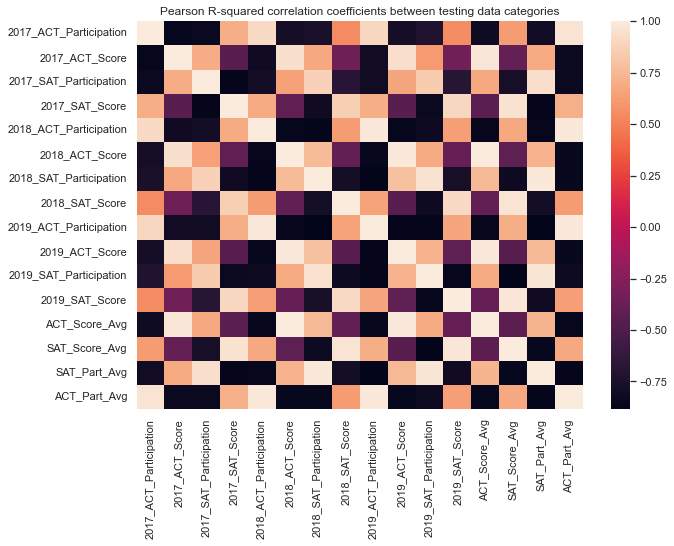

In [200]:
sns.set(rc={'figure.figsize':(10,10/1.4)})
heatmap_test_df = sns.heatmap(test_df.corr(), annot=False)\
.set(title = 'Pearson R-squared correlation coefficients between testing data categories',)
plt.savefig('../assets/heatmap.png')

Here we see strong negative correlations between participation and score, that participation on tests is correlated throughout the years, and that the correlation between participation on the two tests is negative.

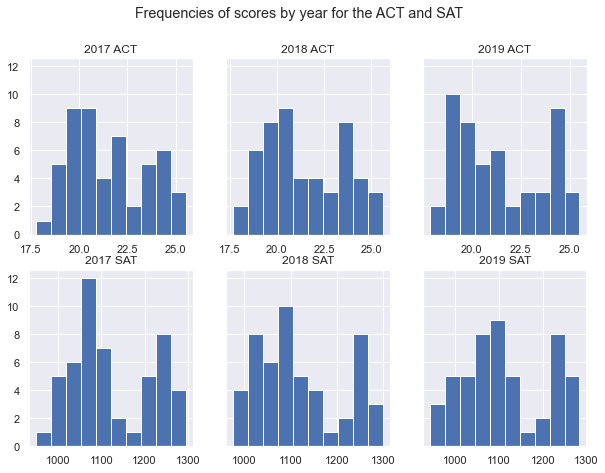

In [201]:
sns.set(rc={'figure.figsize':(10,10/1.4)})

years = ['2017','2018','2019']
tests = ['ACT','SAT']
fig, axs = plt.subplots(2, 3,sharey=True)
fig.suptitle("Frequencies of scores by year for the ACT and SAT")
for i in [0,1]:
    for j in [0,1,2]:
        axs[i,j].hist(test_df[f'{years[j]}_{tests[i]}_Score'])
        axs[i,j].set_title(f'{years[j]} {tests[i]}')
plt.savefig('../assets/ScoreFequencyHistograms.png')

Here we see a distribution of test scores that is almost normal.  We can not assume that the underlying distribution of test scores is normal, and so using standard deviations to determine the likelihood, based solely on score, of a test observation is not possible.

In [157]:
test_df.columns

Index(['2017_ACT_Participation', '2017_ACT_Score', '2017_SAT_Participation',
       '2017_SAT_Score', '2018_ACT_Participation', '2018_ACT_Score',
       '2018_SAT_Participation', '2018_SAT_Score', '2019_ACT_Participation',
       '2019_ACT_Score', '2019_SAT_Participation', '2019_SAT_Score',
       'ACT_Score_Avg', 'SAT_Score_Avg', 'SAT_Part_Avg', 'ACT_Part_Avg'],
      dtype='object')

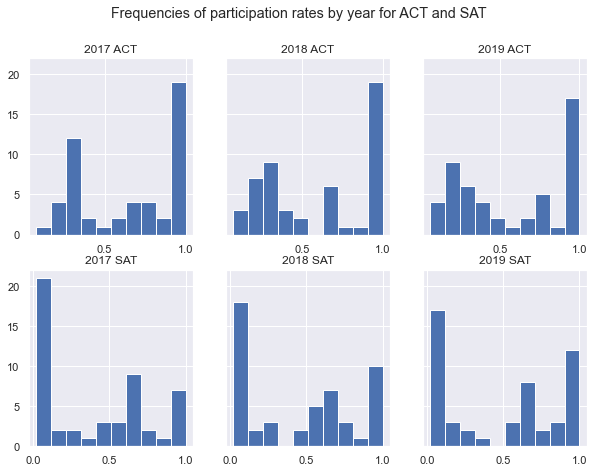

In [202]:
years = ['2017','2018','2019']
tests = ['ACT','SAT']
fig, axs = plt.subplots(2, 3,sharey=True)
fig.suptitle("Frequencies of participation rates by year for ACT and SAT")
for i in [0,1]:
    for j in [0,1,2]:
        axs[i,j].hist(test_df[f'{years[j]}_{tests[i]}_Participation'])
        axs[i,j].set_title(f'{years[j]} {tests[i]}')
plt.savefig('../assets/ParticipationFrequencies.png')

Here we see slightly declining participation in the ACT and a slight increase in participation in the SAT.

3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels

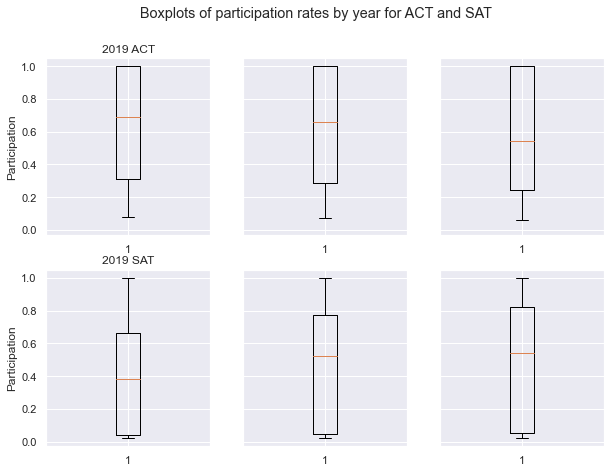

In [207]:
years = ['2017','2018','2019']
tests = ['ACT','SAT']
fig, axs = plt.subplots(2, 3,sharey=True)
fig.suptitle("Boxplots of participation rates by year for ACT and SAT")
for i in [0,1]:
    for j in [0,1,2]:
        axs[i,j].boxplot(test_df[f'{years[j]}_{tests[i]}_Participation'])
        axs[i,0].set_title(f'{years[j]} {tests[i]}')
        axs[i,0].set_ylabel('Participation')
plt.savefig('../assets/BoxplotParticipationRates.png')

Here we again see ACT participation dropping off noticeably between 2017 and 2019 while SAT Scores see a corresponding rise.  Of note are the interquartile ranges.  From the output below, we can see ACT's median participation declines from .69 to .54 while the 25th percentile declines from .31 to .25.  Also, the mean participation drops slightly from .65 to .59.  While the median starts above the mean in 2017, suggesting a slight left skew in the data, the mean in 2019 is slightly above the median, suggesting a slight right skew.

For the SAT participation, between 2017 and 2019 the mean increases from .4 to .49, the median increases from .38 to .54, the 75th percentile increases from .66 to .82, and the 25th percentile increases slightly from .04 to .06.

In [215]:
test_df.iloc[:,0:-4:4].describe()

,2017_ACT_Participation,2018_ACT_Participation,2019_ACT_Participation
count,51.000000,51.000000,51.000000
mean,0.652549,0.617255,0.586667
std,0.321408,0.340371,0.345159
min,0.080000,0.070000,0.060000
25%,0.310000,0.285000,0.245000
50%,0.690000,0.660000,0.540000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


Above we see numerically the decline in ACT Participation fro .65 in 2017 to .59 in 2018

In [213]:
test_df.iloc[:,1:-3:4].describe()

,2017_ACT_Score,2018_ACT_Score,2019_ACT_Score
count,51.000000,51.000000,51.000000
mean,21.519608,21.496078,21.464706
std,2.020695,2.111583,2.194523
min,17.800000,17.700000,17.900000
25%,19.800000,19.950000,19.800000
50%,21.400000,21.300000,21.100000
75%,23.600000,23.650000,23.700000
max,25.500000,25.600000,25.500000


Surprisingly, there is actually a slight decrease 

In [216]:
test_df.iloc[:,2:-3:4].describe()

,2017_SAT_Participation,2018_SAT_Participation,2019_SAT_Participation
count,51.000000,51.000000,51.000000
mean,0.398039,0.457451,0.490588
std,0.352766,0.373143,0.387476
min,0.020000,0.020000,0.020000
25%,0.040000,0.045000,0.055000
50%,0.380000,0.520000,0.540000
75%,0.660000,0.775000,0.820000
max,1.000000,1.000000,1.000000


Again, the numerical analysis show the SAT participation increasing from 0.40 to 0.49

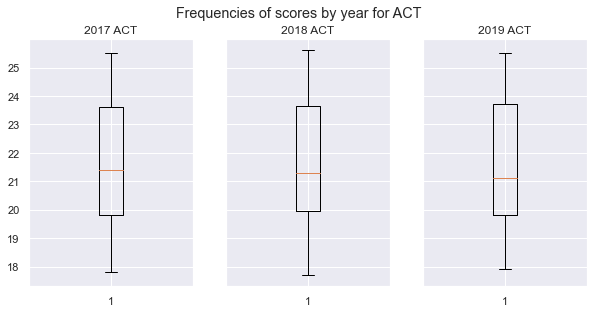

In [79]:
sns.set(rc={'figure.figsize':(10,10/2.2)})
years = ['2017','2018','2019']
tests = ['ACT','SAT']
fig, axs = plt.subplots(1, 3,sharey=True)
fig.suptitle("Frequencies of scores by year for ACT")
# for i in [0]:
for j in [0,1,2]:
    axs[j].boxplot(test_df[f'{years[j]}_{tests[0]}_Score'])
    axs[j].set_title(f'{years[j]} {tests[0]}')
plt.savefig('../assets/BoxplotParticipationRates.png')

As confirmed by the descriptive statistics below, ACT scores do not change much at all from year to year, with the mean falling from 21.52 to 21.46 and the median falling from 21.4 to 21.1.

In [80]:
test_df.iloc[:,1::4].describe()

,2017_ACT_Score,2018_ACT_Score,2019_ACT_Score,SAT_Score_Avg
count,51.000000,51.000000,51.000000,51.000000
mean,21.519608,21.496078,21.464706,1119.732026
std,2.020695,2.111583,2.194523,90.974771
min,17.800000,17.700000,17.900000,967.333333
25%,19.800000,19.950000,19.800000,1056.000000
50%,21.400000,21.300000,21.100000,1094.333333
75%,23.600000,23.650000,23.700000,1200.166667
max,25.500000,25.600000,25.500000,1292.333333


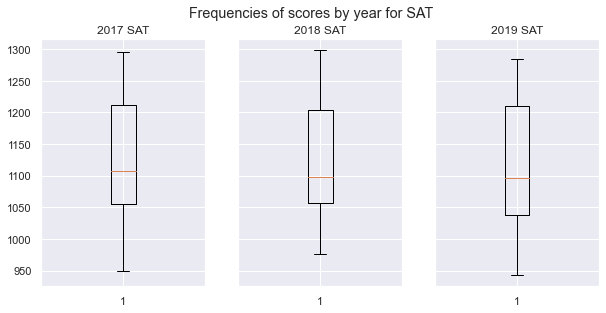

In [81]:
sns.set(rc={'figure.figsize':(10,10/2.2)})
years = ['2017','2018','2019']
tests = ['ACT','SAT']
fig, axs = plt.subplots(1, 3,sharey=True)
fig.suptitle("Frequencies of scores by year for SAT")
# for i in [0]:
for j in [0,1,2]:
    axs[j].boxplot(test_df[f'{years[j]}_{tests[1]}_Score'])
    axs[j].set_title(f'{years[j]} {tests[1]}')

Overall the SAT test scores are not changing much here.  I don't think we would find statistical evidence that the score distributions are different.

In [82]:
test_df.iloc[:,3::4].describe()

,2017_SAT_Score,2018_SAT_Score,2019_SAT_Score,ACT_Part_Avg
count,51.000000,51.000000,51.000000,51.000000
mean,1126.098039,1120.019608,1113.078431,0.618824
std,92.494812,94.155083,97.197910,0.328698
min,950.000000,977.000000,943.000000,0.070000
25%,1055.500000,1057.500000,1038.000000,0.280000
50%,1107.000000,1098.000000,1097.000000,0.643333
75%,1212.000000,1204.000000,1210.000000,0.990000
max,1295.000000,1298.000000,1284.000000,1.000000


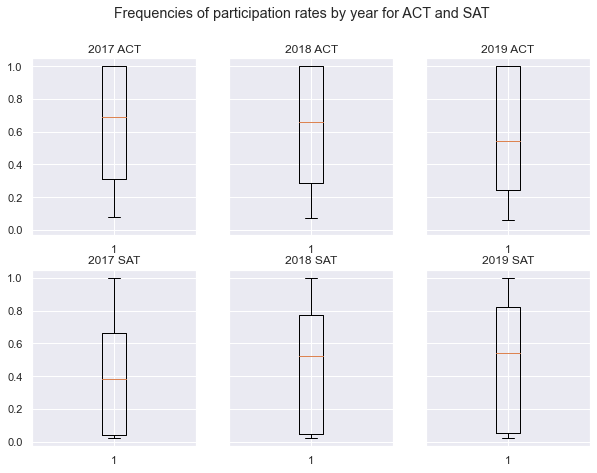

In [83]:
sns.set(rc={'figure.figsize':(10,10/1.4)})
years = ['2017','2018','2019']
tests = ['ACT','SAT']
fig, axs = plt.subplots(2, 3,sharey=True)
fig.suptitle("Frequencies of participation rates by year for ACT and SAT")
for i in [0,1]:
    for j in [0,1,2]:
        axs[i,j].boxplot(test_df[f'{years[j]}_{tests[i]}_Participation'])
        axs[i,j].set_title(f'{years[j]} {tests[i]}')

4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.

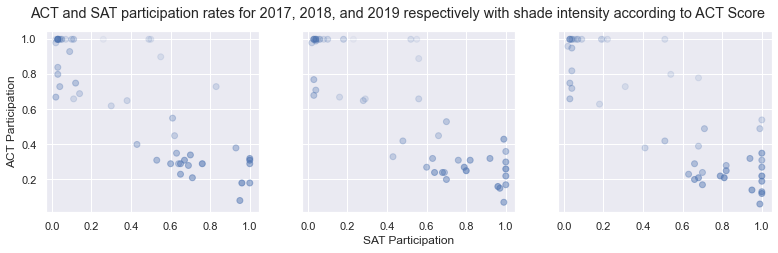

In [84]:
sns.set(rc={'figure.figsize':(13,10/3)})
years = ['2017','2018','2019']
tests = ['ACT','SAT']
fig, axs = plt.subplots(1, 3,sharey=True)
fig.suptitle("ACT and SAT participation rates for 2017, 2018, and 2019 respectively with shade intensity according to ACT Score")
# axs.set_ylabel('Proportion')


for j in [0,1,2]:
    axs[j].scatter(x=test_df[f'{years[j]}_SAT_Participation'],\
                     y = test_df[f'{years[j]}_ACT_Participation'],
                     alpha = (test_df[f'{years[j]}_ACT_Score']-17)/15)
    # axs[j].set_title(f'{years[j]} {tests[i]}')
    axs[0].set_ylabel('ACT Participation')
    axs[1].set_xlabel('SAT Participation')
    

From the scatter plot we see that there appears to be an inverse relationship between SAT and ACT participation.  2018 and 2019 indicate shifts towards more states with near 100% SAT participation.  There is a cluster of states on the bottom right with high SAT and low ACT participation, while on the upper left there are a number of states with high ACT and low SAT participation. Looking at the shades determined by ACT Scores, the shades are darkest for the high SAT/low ACT participation groups as expected.   Ther is an interesting trend for the ACT score for a given ACT participation level to drop slightly as SAT participation rises, perhaps due to the conflicting demands on test prep focus.  Another explenation could be a self selection bias, where the students with test taking difficulties are more likely to attempt multiple tests in order to achieve a high score.  If a student scores near perfectly on one test, they will likely feel less pressure to attempt a different exam.  Note that shade can by confounded by the density of points at a particular participation coordinate.

Overall, I believe that there could be some benefit in concentration on a single exam.  This could also allow teachers to tilt their instructions towards preparation for that single exam and would make exam study groups esier to form. 

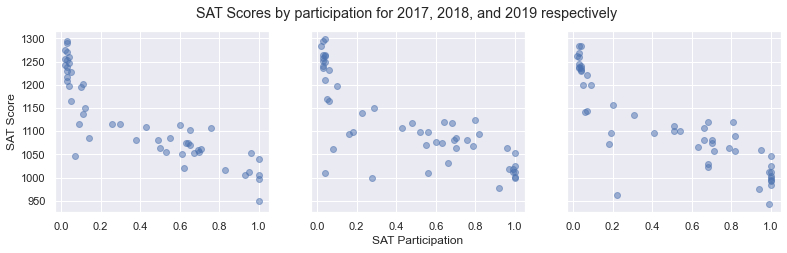

In [85]:
sns.set(rc={'figure.figsize':(13,10/3)})
years = ['2017','2018','2019']
tests = ['ACT','SAT']
fig, axs = plt.subplots(1, 3,sharey=True)
fig.suptitle("SAT Scores by participation for 2017, 2018, and 2019 respectively")
# axs.set_ylabel('Proportion')


for j in [0,1,2]:
    axs[j].scatter(x=test_df[f'{years[j]}_SAT_Participation'],\
                     y = test_df[f'{years[j]}_SAT_Score'],
                     alpha = .5)
#     test_df[f'{years[j]}_ACT_Participation']/2
    # axs[j].set_title(f'{years[j]} {tests[i]}')
    axs[0].set_ylabel('SAT Score')
    axs[1].set_xlabel('SAT Participation')

As expected we see here that SAT scores decline with participation, with a steep drop for participation above a 10%, whhich a more steady decline thereafter.  Interestingly, there is still significant variation of scores at all participation levels.

It would be interesting to see if a sudden change in participation has an affect on test scores.

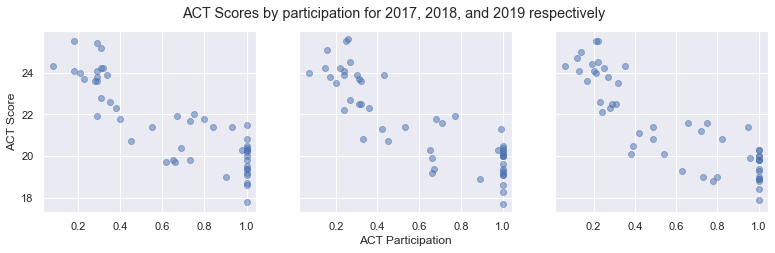

In [86]:
sns.set(rc={'figure.figsize':(13,10/3)})
years = ['2017','2018','2019']
tests = ['ACT','SAT']
fig, axs = plt.subplots(1, 3,sharey=True)
fig.suptitle("ACT Scores by participation for 2017, 2018, and 2019 respectively")
# axs.set_ylabel('Proportion')


for j in [0,1,2]:
    axs[j].scatter(x=test_df[f'{years[j]}_ACT_Participation'],\
                     y = test_df[f'{years[j]}_ACT_Score'],
                     alpha = .5)
#     test_df[f'{years[j]}_ACT_Participation']/2
    # axs[j].set_title(f'{years[j]} {tests[i]}')
    axs[0].set_ylabel('ACT Score')
    axs[1].set_xlabel('ACT Participation')

Here with the ACT we dont see a cluster of participation rates less than .1, but we do see significant variation regardless of participation.  We again see a steeper decline in scores as participation increases from low levels and a more steady decline after with a participation rate of .4.  While the SAT had its highest density of participation close to zero, for the ACT the highest participation density is at 100%.  This highest density also characterizes a broad range of outcomes of almost four for 2017 and 2018. 

note: I'll need proportion to proport, test to proportion, test to test?

additional plots

plot change in percentage, change in test scores by state

In [87]:
test_df.shape

(51, 16)

In [88]:
test_df.head(1)

,2017_ACT_Participation,2017_ACT_Score,2017_SAT_Participation,2017_SAT_Score,2018_ACT_Participation,2018_ACT_Score,2018_SAT_Participation,2018_SAT_Score,2019_ACT_Participation,2019_ACT_Score,2019_SAT_Participation,2019_SAT_Score,ACT_Score_Avg,SAT_Score_Avg,SAT_Part_Avg,ACT_Part_Avg
State,,,,,,,,,,,,,,,,
Alabama,1.0,19.2,0.05,1165.0,1.0,19.1,0.06,1166.0,1.0,18.9,0.07,1143.0,19.066667,1158.0,0.06,1.0


In [89]:
test_delta = pd.DataFrame()
for i in range(4,12):
    test_delta[f'{test_df.columns[i]}_Change']=test_df.iloc[:,i]-test_df.iloc[:,i-4]
test_delta.head(5)


,2018_ACT_Participation_Change,2018_ACT_Score_Change,2018_SAT_Participation_Change,2018_SAT_Score_Change,2019_ACT_Participation_Change,2019_ACT_Score_Change,2019_SAT_Participation_Change,2019_SAT_Score_Change
State,,,,,,,,
Alabama,0.00,-0.1,0.01,1.0,0.00,-0.2,0.01,-23.0
Alaska,-0.32,1.0,0.05,26.0,0.05,-0.7,-0.02,-9.0
Arizona,0.04,-0.5,-0.01,33.0,0.07,-0.2,0.02,-15.0
Arkansas,0.00,0.0,0.02,-39.0,0.00,-0.1,0.01,-28.0
California,-0.04,-0.1,0.07,21.0,-0.04,-0.1,0.03,-11.0


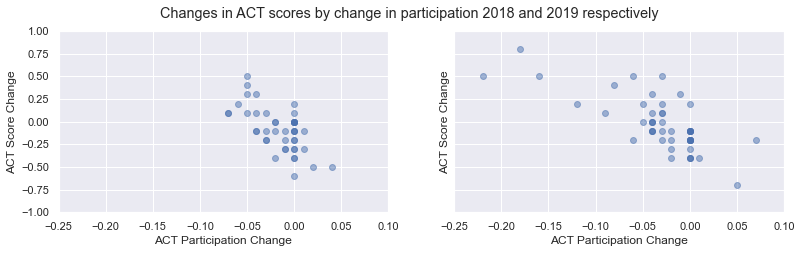

In [220]:
sns.set(rc={'figure.figsize':(13,10/3)})
years = ['2018','2019']
tests = ['ACT','SAT']
fig, axs = plt.subplots(1, 2,sharey=True)
fig.suptitle("Changes in ACT scores by change in participation 2018 and 2019 respectively")
# axs.set_ylabel('Proportion')


for j in [0,1]:
    axs[j].scatter(x=test_delta[f'{years[j]}_ACT_Participation_Change'],\
                     y = test_delta[f'{years[j]}_ACT_Score_Change'],
                     alpha = .5)
#     test_df[f'{years[j]}_ACT_Participation']/2
    # axs[j].set_title(f'{years[j]} {tests[i]}')
    axs[j].set_ylabel('ACT Score Change')
    axs[j].set_xlabel('ACT Participation Change')
    axs[j].set_xlim([-.25,.1])
    axs[j].set_ylim([-1,1])
    plt.savefig('../assets/Deltas_ACT_scores_participation.png')

plt.savefig('../assets/BoxplotParticipationRates.png')

Here we see a fairly linear inverse relationship between ACT score change and the change in a state's yearly participation.  We can now be sure that as Decreasing participation increases the 

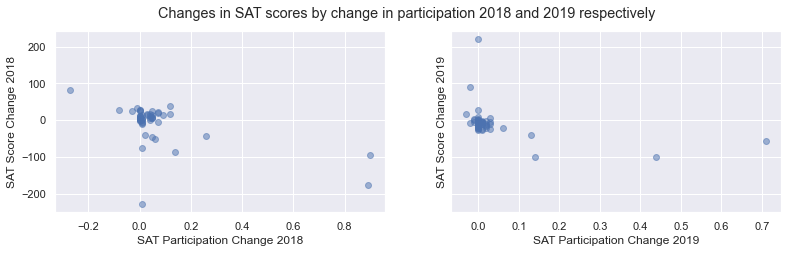

In [178]:
sns.set(rc={'figure.figsize':(13,10/3)})
years = ['2018','2019']
tests = ['ACT','SAT']
fig, axs = plt.subplots(1, 2,sharey=True)
fig.suptitle("Changes in SAT scores by change in participation 2018 and 2019 respectively")
# axs.set_ylabel('Proportion')


for j in [0,1]:
    axs[j].scatter(x=test_delta[f'{years[j]}_SAT_Participation_Change'],\
                     y = test_delta[f'{years[j]}_SAT_Score_Change'],
                     alpha = .5)
#     test_df[f'{years[j]}_ACT_Participation']/2
    # axs[j].set_title(f'{years[j]} {tests[i]}')
    axs[j].set_ylabel(f'SAT Score Change {years[j]}')
    axs[j].set_xlabel(f'SAT Participation Change {years[j]}')
    # axs[j].set_xlim([-.25,.1])
    # axs[j].set_ylim([-1,1])

In [123]:
test_df[test_df['ACT_Part_Avg']==1]['ACT_Score_Avg'].sort_values(ascending = False).index

Index(['Wisconsin', 'Utah', 'Montana', 'Kentucky', 'Wyoming', 'Tennessee',
       'Arkansas', 'Oklahoma', 'Louisiana', 'Alabama', 'North Carolina',
       'Mississippi', 'Nevada'],
      dtype='object', name='State')

In [ ]:
# test_df[test_df['ACT_Part_Avg']==1]['ACT_Score_Avg'].sort_values(ascending = False).index

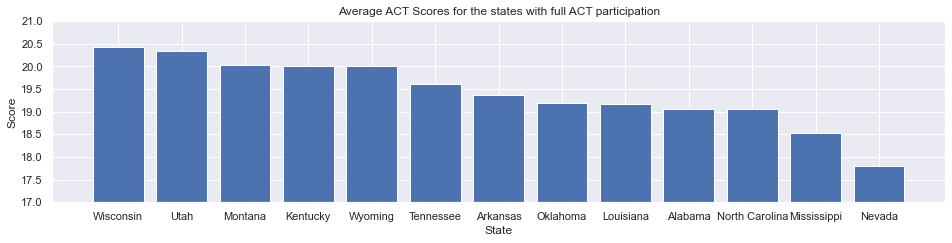

In [141]:
sns.set(rc={'figure.figsize':(16,10/3)})
fig, ax = plt.subplots()

p = ax.bar(x = test_df[test_df['ACT_Part_Avg']==1]['ACT_Score_Avg'].sort_values(ascending = False).index, \
        height = test_df[test_df['ACT_Part_Avg']==1]['ACT_Score_Avg'].sort_values(ascending = False).values)
ax.set_xlabel("State")
ax.set_ylabel("Score")
ax.set_title(label ="Average ACT Scores for the states with full ACT participation")
ax.set_ylim(17,21)
plt.show()

In [179]:
test_df.loc['Nevada']

2017_ACT_Participation       1.000000
2017_ACT_Score              17.800000
2017_SAT_Participation       0.260000
2017_SAT_Score            1116.000000
2018_ACT_Participation       1.000000
2018_ACT_Score              17.700000
2018_SAT_Participation       0.230000
2018_SAT_Score            1140.000000
2019_ACT_Participation       1.000000
2019_ACT_Score              17.900000
2019_SAT_Participation       0.200000
2019_SAT_Score            1156.000000
ACT_Score_Avg               17.800000
SAT_Score_Avg             1137.333333
SAT_Part_Avg                 0.230000
ACT_Part_Avg                 1.000000
Name: Nevada, dtype: float64

In [146]:
test_df[test_df['SAT_Part_Avg']>.8]['SAT_Score_Avg'].sort_values(ascending = False)

State
New Hampshire           1058.000000
Connecticut             1046.666667
Rhode Island            1025.000000
Maine                   1012.666667
Michigan                1006.333333
Idaho                    999.666667
Delaware                 993.000000
District of Columbia     967.333333
Name: SAT_Score_Avg, dtype: float64

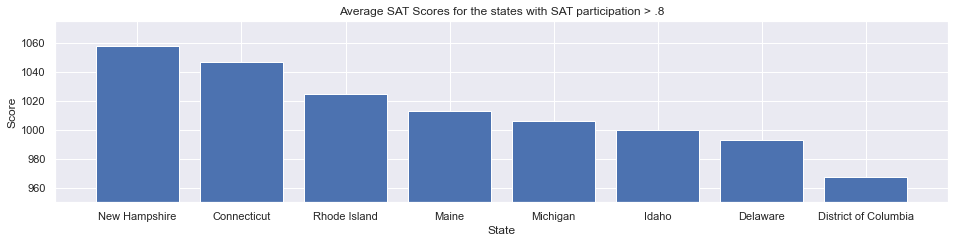

In [149]:
sns.set(rc={'figure.figsize':(16,10/3)})
fig, ax = plt.subplots()

p = ax.bar(x = test_df[test_df['SAT_Part_Avg']>.8]['SAT_Score_Avg'].sort_values(ascending = False).index, \
        height = test_df[test_df['SAT_Part_Avg']>.8]['SAT_Score_Avg'].sort_values(ascending = False).values)
ax.set_xlabel("State")
ax.set_ylabel("Score")
ax.set_title(label ="Average SAT Scores for the states with SAT participation > .8")
ax.set_ylim(950,1075)
plt.show()

In [112]:
test_df[["ACT_Part_Avg",'SAT_Part_Avg','SAT_Score_Avg','ACT_Score_Avg']].describe()

,ACT_Part_Avg,SAT_Part_Avg,SAT_Score_Avg,ACT_Score_Avg
count,51.000000,51.000000,51.000000,51.000000
mean,0.618824,0.448693,1119.732026,21.493464
std,0.328698,0.357529,90.974771,2.078130
min,0.070000,0.020000,967.333333,17.800000
25%,0.280000,0.045000,1056.000000,19.966667
50%,0.643333,0.506667,1094.333333,21.400000
75%,0.990000,0.726667,1200.166667,23.400000
max,1.000000,1.000000,1292.333333,25.466667


In [192]:
np.array(test_delta[abs(test_delta['2018_ACT_Participation_Change'])<.05]['2018_ACT_Score_Change']).std()


0.2783323590767848

In [110]:
test_delta[test_delta['2019_SAT_Score_Change']==220]
test_delta.describe()


,2018_ACT_Participation_Change,2018_ACT_Score_Change,2018_SAT_Participation_Change,2018_SAT_Score_Change,2019_ACT_Participation_Change,2019_ACT_Score_Change,2019_SAT_Participation_Change,2019_SAT_Score_Change
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,-0.035294,-0.023529,0.059412,-6.078431,-0.030588,-0.031373,0.033137,-6.941176
std,0.134571,0.713187,0.182717,50.674587,0.050613,0.288090,0.117499,41.717340
min,-0.700000,-1.700000,-0.270000,-228.000000,-0.220000,-0.700000,-0.030000,-100.000000
25%,-0.040000,-0.300000,0.000000,-2.500000,-0.040000,-0.200000,0.000000,-19.500000
50%,-0.010000,-0.100000,0.010000,6.000000,-0.020000,-0.100000,0.000000,-8.000000
75%,0.000000,0.100000,0.050000,16.500000,0.000000,0.100000,0.020000,-2.000000
max,0.250000,3.100000,0.900000,82.000000,0.070000,0.800000,0.710000,220.000000


Surprisingly, the relationship between change in participation and change in scores very slight for the SAT in 2018 and almost non-existent in 2019.  However, there are few states with a drastic change, so it would be difficult to see a relationship if there is indeed one.  Of note are a few outliers/ high leverage points. One state with over a .7 change in participation in 2019 only saw around a 60 point decrease in SAT Scores while another with no change in participation saw a 220 point increase.  Upon investigating the 220 point increase we see that it is for Utah, which had a very low participation rate and also a decrease in SAT score of 228 in 2018.  Thus, the 2019 variation could be a reversion around the mean and due to natural variation.  However, further investigation is required due to the magnitude of the change.

In [ ]:
test_df.sort_values("ACT_Part_Avg", ascending = False)

In [ ]:
test_df.columns

In [121]:
test_df.loc['District of Columbia',]

2017_ACT_Participation      0.320000
2017_ACT_Score             24.200000
2017_SAT_Participation      1.000000
2017_SAT_Score            950.000000
2018_ACT_Participation      0.320000
2018_ACT_Score             23.600000
2018_SAT_Participation      0.920000
2018_SAT_Score            977.000000
2019_ACT_Participation      0.320000
2019_ACT_Score             23.500000
2019_SAT_Participation      0.940000
2019_SAT_Score            975.000000
ACT_Score_Avg              23.766667
SAT_Score_Avg             967.333333
SAT_Part_Avg                0.953333
ACT_Part_Avg                0.320000
Name: District of Columbia, dtype: float64

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

**To-Do:** *Edit this cell with your conclusions and recommendations.*
I recommend making case studies of all the states that consistently perform particularly well given their level of participation. 

For the ACT, Wisconsin with 20.43, Utah with 20.33, Montana with 20.03, Kentucky with 20.00, and Wyoming with 20.00 all had an edge over the other states that shared their 100% ACT participation accross all years.  Nevada, with an ACT score of 17.80, would be worthwhile investigating as a counterexample.  

For the SAT, there were fewer states with extremely high participation.  However, New Hampshire's score of 1058 (.96 participation) and Connecticut's score of 1047 (full participation) are notable.  In contrast, the Distric of Columbia's SAT average score of 967 (.95 participation) is the lowest in the data and also beckons inquiry.

I recommend choosing a stardardized test as a benchmark exam and pursuing school district wide legislation making graduation conditional on participation on 

I recommend further investigating past interventions, examining the education literature, and looking at further metrics of high school outcomes such as dropout rates.  Dropout rates are an important considerated with respect to this analysis, as only the scores of graduates were aggregated for each state. Thus, simply making a high score a graduation requirement would improve the optics based on the data examined in this report, but it would not improve the overall outcome.  

Don't forget to create your README!

**To-Do:** *If you combine your problem statement, data dictionary, brief summary of your analysis, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.* Don't forget to cite your data sources!